In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
sm_data = pd.read_csv("../datasets/TrainNER_Pred_en_core_web_sm.csv", sep=';', encoding='utf-8')
md_data = pd.read_csv("../datasets/TrainNER_Pred_en_core_web_md.csv", sep=';', encoding='utf-8')
lg_data = pd.read_csv("../datasets/TrainNER_Pred_en_core_web_lg.csv", sep=';', encoding='utf-8')
train_data = pd.read_csv("../datasets/TrainingPrediction.csv", sep=',', encoding='cp1250')
models = ['sm','md','lg','tr']

In [3]:
sm_data.head()

,Unnamed: 0,Unnamed: 0.1,Sentence,Word,Tag,Category,OriginalPrediction,SentenceID,Prediction
0,0,0,Sentence: 1,President,NNP,B-per,O,0.0,O
1,1,1,NaN,Karzai,NNP,I-per,B-PERSON,1.0,B-per
2,2,2,NaN,thanked,VBD,O,O,1.0,O
3,3,3,NaN,his,PRP$,O,O,1.0,O
4,4,4,NaN,allies,NNS,O,O,1.0,O


In [4]:
md_data.head()

,Unnamed: 0,Unnamed: 0.1,Sentence,Word,Tag,Category,OriginalPrediction,SentenceID,Prediction
0,0,0,Sentence: 1,President,NNP,B-per,O,0.0,O
1,1,1,NaN,Karzai,NNP,I-per,B-GPE,1.0,B-geo
2,2,2,NaN,thanked,VBD,O,O,1.0,O
3,3,3,NaN,his,PRP$,O,O,1.0,O
4,4,4,NaN,allies,NNS,O,O,1.0,O


In [5]:
lg_data.head()

,Unnamed: 0,Unnamed: 0.1,Sentence,Word,Tag,Category,OriginalPrediction,SentenceID,Prediction
0,0,0,Sentence: 1,President,NNP,B-per,O,0.0,O
1,1,1,NaN,Karzai,NNP,I-per,B-PERSON,1.0,B-per
2,2,2,NaN,thanked,VBD,O,O,1.0,O
3,3,3,NaN,his,PRP$,O,O,1.0,O
4,4,4,NaN,allies,NNS,O,O,1.0,O


In [6]:
train_data.head()

,Unnamed: 0,Sentence #,Word,POS,Tag,Prediction
0,0,Sentence: 1,President,NNP,B-per,B-per
1,1,NaN,Karzai,NNP,I-per,I-per
2,2,NaN,thanked,VBD,O,O
3,3,NaN,his,PRP$,O,O
4,4,NaN,allies,NNS,O,O


In [7]:
merged = pd.merge(sm_data, md_data, suffixes=('_sm', '_md'), how='outer', left_index=True, right_index=True)
merged2 = pd.merge(lg_data, train_data, suffixes=('_lg', '_tr'), how='outer', left_index=True, right_index=True)
merged = pd.merge(merged, merged2, how='outer', left_index=True, right_index=True)
merged.head()

,Unnamed: 0_sm,Unnamed: 0.1_sm,Sentence_sm,Word_sm,Tag_sm,Category_sm,OriginalPrediction_sm,SentenceID_sm,Prediction_sm,Unnamed: 0_md,...,Category,OriginalPrediction,SentenceID,Prediction_lg,Unnamed: 0_tr,Sentence #,Word_tr,POS,Tag_tr,Prediction_tr
0,0,0,Sentence: 1,President,NNP,B-per,O,0.0,O,0,...,B-per,O,0.0,O,0,Sentence: 1,President,NNP,B-per,B-per
1,1,1,NaN,Karzai,NNP,I-per,B-PERSON,1.0,B-per,1,...,I-per,B-PERSON,1.0,B-per,1,NaN,Karzai,NNP,I-per,I-per
2,2,2,NaN,thanked,VBD,O,O,1.0,O,2,...,O,O,1.0,O,2,NaN,thanked,VBD,O,O
3,3,3,NaN,his,PRP$,O,O,1.0,O,3,...,O,O,1.0,O,3,NaN,his,PRP$,O,O
4,4,4,NaN,allies,NNS,O,O,1.0,O,4,...,O,O,1.0,O,4,NaN,allies,NNS,O,O


In [8]:
merged.keys()

Index(['Unnamed: 0_sm', 'Unnamed: 0.1_sm', 'Sentence_sm', 'Word_sm', 'Tag_sm',
       'Category_sm', 'OriginalPrediction_sm', 'SentenceID_sm',
       'Prediction_sm', 'Unnamed: 0_md', 'Unnamed: 0.1_md', 'Sentence_md',
       'Word_md', 'Tag_md', 'Category_md', 'OriginalPrediction_md',
       'SentenceID_md', 'Prediction_md', 'Unnamed: 0_lg', 'Unnamed: 0.1',
       'Sentence', 'Word_lg', 'Tag_lg', 'Category', 'OriginalPrediction',
       'SentenceID', 'Prediction_lg', 'Unnamed: 0_tr', 'Sentence #', 'Word_tr',
       'POS', 'Tag_tr', 'Prediction_tr'],
      dtype='object')

In [9]:
df = merged[['Sentence_sm','Word_sm','Category_sm','Prediction_sm','Prediction_md','Prediction_lg','Prediction_tr',
'OriginalPrediction_sm','OriginalPrediction_md','OriginalPrediction']].copy()

In [99]:
df = df.rename(columns={'Sentence_sm': 'Sentence', 'Word_sm':'Word', 'Category_sm':'Target', 'OriginalPrediction':'OriginalPrediction_lg'})
df.head()

,Sentence,Word,Target,Prediction_sm,Prediction_md,Prediction_lg,Prediction_tr,OriginalPrediction_sm,OriginalPrediction_md,OriginalPrediction_lg
0,Sentence: 1,President,B-per,O,O,O,B-per,O,O,O
1,NaN,Karzai,I-per,B-per,B-geo,B-per,I-per,B-PERSON,B-GPE,B-PERSON
2,NaN,thanked,O,O,O,O,O,O,O,O
3,NaN,his,O,O,O,O,O,O,O,O
4,NaN,allies,O,O,O,O,O,O,O,O


In [11]:
results_raw = []
for model in models:
    result = {
        "Size": df.shape[0],
        "CorrectPrediction": df.loc[df['Target'] == df['Prediction_'+model]].shape[0],
        "CorrectEntityPrediction": df.loc[(df['Target'] != "O") & (df['Target'] == df['Prediction_'+model])].shape[0],
        "TargetEntity": df.loc[df['Target'] != "O"].shape[0],
        "PredictedEntity": df.loc[df['Prediction_'+model] != "O"].shape[0]
    }
    results_raw.append(result)

In [12]:
results_raw

[{'Size': 196646,
  'CorrectPrediction': 178588,
  'CorrectEntityPrediction': 18380,
  'TargetEntity': 30036,
  'PredictedEntity': 32141},
 {'Size': 196646,
  'CorrectPrediction': 179008,
  'CorrectEntityPrediction': 18607,
  'TargetEntity': 30036,
  'PredictedEntity': 32087},
 {'Size': 196646,
  'CorrectPrediction': 179013,
  'CorrectEntityPrediction': 18723,
  'TargetEntity': 30036,
  'PredictedEntity': 32220},
 {'Size': 196646,
  'CorrectPrediction': 173010,
  'CorrectEntityPrediction': 10563,
  'TargetEntity': 30036,
  'PredictedEntity': 30266}]

In [81]:
res_out = []
for i in range(len(models)):
    o = [models[i]]
    res = results_raw[i]
    o.append(res["CorrectPrediction"] / res["Size"] * 100)
    o.append(res["CorrectEntityPrediction"] / res["TargetEntity"] * 100)
    o.append(res["CorrectEntityPrediction"] / res["PredictedEntity"] * 100)
    res_out.append(o)

In [14]:
res_out

[['sm', 90.81700110859107, 61.193234784924755, 57.18552627485144],
 ['md', 91.03058287481058, 61.94899453988547, 57.989216816779376],
 ['lg', 91.03312551488462, 62.33519776268478, 58.1098696461825],
 ['tr', 87.98043184199017, 35.16779864163004, 34.900548470230625]]

In [15]:
results = pd.DataFrame(res_out, columns=['model','accuracy','coverage','precision'])

In [16]:
results

,model,accuracy,coverage,precision
0,sm,90.817001,61.193235,57.185526
1,md,91.030583,61.948995,57.989217
2,lg,91.033126,62.335198,58.109870
3,tr,87.980432,35.167799,34.900548


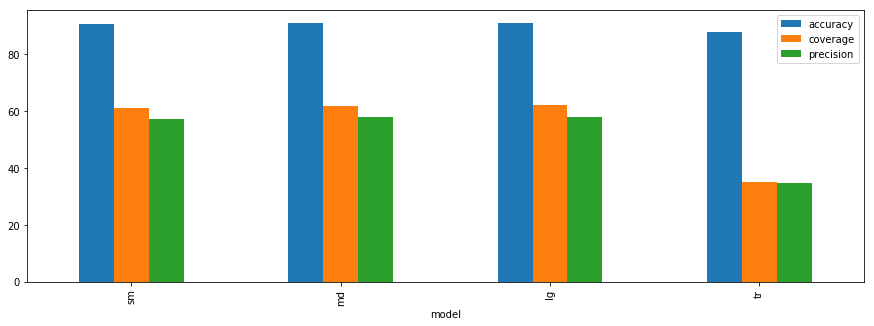

In [39]:
results.plot(x='model', y=['accuracy', 'coverage', 'precision'], figsize=(15,5), kind='bar')
plt.show()

In [68]:
errs_by_target = []
errs_by_model = []
for cat in df['Target'].unique():
    row_t = [cat]
    row_m = [cat]
    for model in models:
        n = df.loc[(df['Target'] == cat) & (df['Target'] != df['Prediction_'+model])].shape[0]
        row_t.append(n)
        n = df.loc[(df['Prediction_'+model] == cat) & (df['Target'] != df['Prediction_'+model])].shape[0]
        row_m.append(n)
    errs_by_target.append(row_t)
    errs_by_model.append(row_m)
errs_by_target = pd.DataFrame(errs_by_target[:-2], columns=['category', 'errors_sm', 'errors_md', 'errors_lg', 'errors_tr'])
errs_by_model = pd.DataFrame(errs_by_model[:-2], columns=['category', 'errors_sm', 'errors_md', 'errors_lg', 'errors_tr'])

In [69]:
errs_by_target

,category,errors_sm,errors_md,errors_lg,errors_tr
0,B-per,2029,1942,1927,2092
1,I-per,1740,1658,1670,2893
2,O,6402,6209,6320,4163
3,B-org,2143,2225,2173,2718
4,B-gpe,785,715,711,1396
5,I-org,1114,1188,1184,2298
6,B-geo,1624,1490,1476,4143
7,I-geo,501,489,477,1362
8,B-time,985,979,970,1142
9,I-time,446,457,442,1062


[]

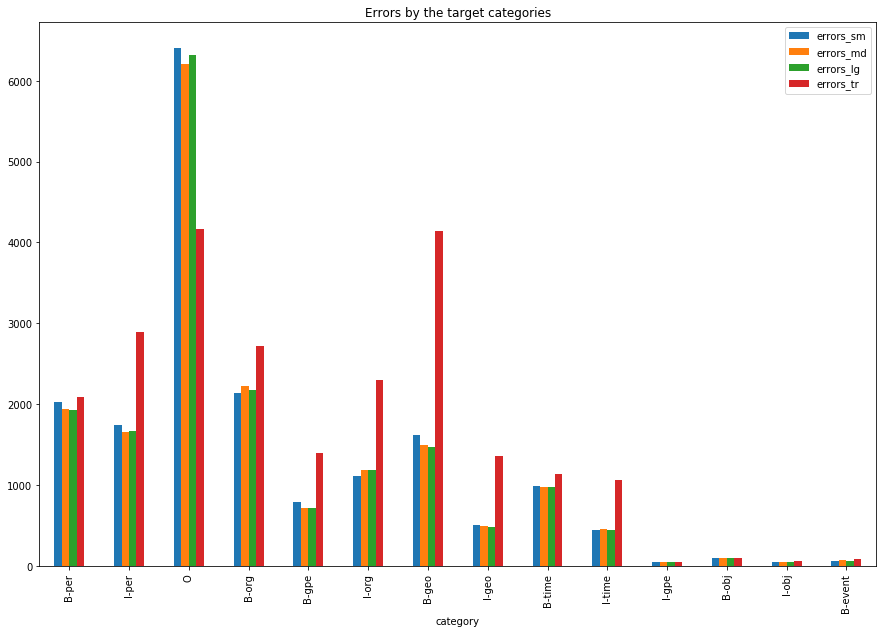

In [76]:
errs_by_target.plot(x='category', y=['errors_sm', 'errors_md', 'errors_lg', 'errors_tr'], figsize=(15,10), kind='bar',
                   title="Errors by the target categories")
plt.plot()

In [72]:
errs_by_model

,category,errors_sm,errors_md,errors_lg,errors_tr
0,B-per,1895,1889,1854,1030
1,I-per,375,399,371,2097
2,O,4297,4158,4136,3933
3,B-org,1611,1468,1412,2251
4,B-gpe,824,868,899,2373
5,I-org,1367,1228,1244,2505
6,B-geo,1952,1969,1897,6382
7,I-geo,873,859,862,760
8,B-time,1760,1734,1823,1203
9,I-time,2411,2380,2422,302


[]

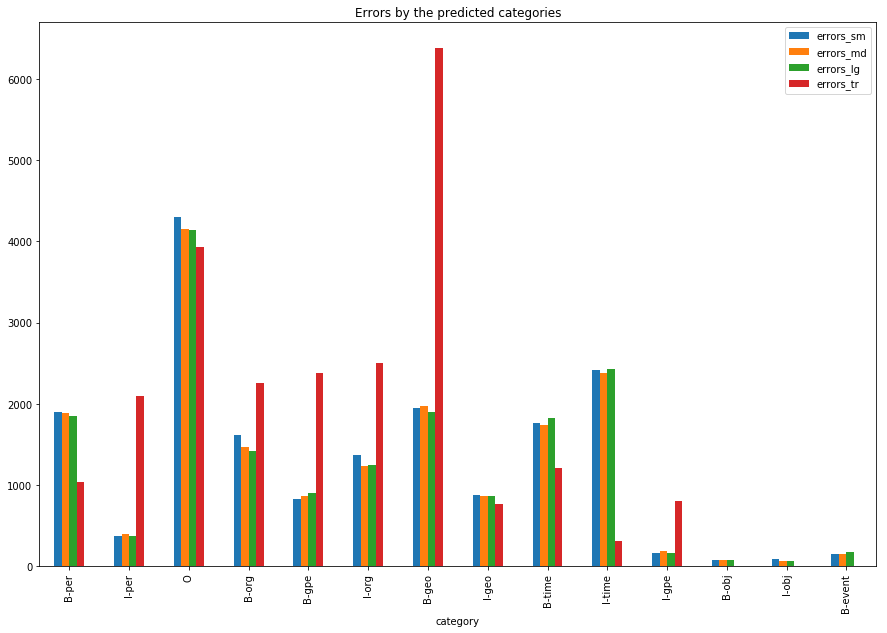

In [77]:
errs_by_model.plot(x='category', y=['errors_sm', 'errors_md', 'errors_lg', 'errors_tr'], figsize=(15,10), kind='bar',
                  title="Errors by the predicted categories")
plt.plot()

In [106]:
def show_errors_in_target(target,model):
    n = df.loc[(df['Target'] == target) & (df['Prediction_'+model] == target)].shape[0]
    print("Correct predictions for target: {} by model: {}    {}".format(target, model, n))
    errs = []
    for cat in df.loc[(df['Target'] == target) & (df['Target'] != df['Prediction_'+model])]['Prediction_'+model].unique():
        n = df.loc[(df['Target'] == target) & (df['Prediction_'+model] == cat)].shape[0]
        errs.append([cat, n])
    errs = pd.DataFrame(errs, columns=['category', 'errors'])
    errs.plot(x='category', y='errors', figsize=(15,7), kind='bar',
               title="Wrongly predicted categories for target: {} by model: {}".format(target, model))
    return errs

def show_errors_in_model(target,model):
    n = df.loc[(df['Target'] == target) & (df['Prediction_'+model] == target)].shape[0]
    print("Correct predictions for target: {} by model: {}    {}".format(target, model, n))
    errs = []
    for cat in df.loc[(df['Prediction_'+model] == target) & (df['Target'] != df['Prediction_'+model])]['Target'].unique():
        n = df.loc[(df['Target'] == cat) & (df['Prediction_'+model] == target)].shape[0]
        errs.append([cat, n])
    errs = pd.DataFrame(errs, columns=['category', 'errors'])
    errs.plot(x='category', y='errors', figsize=(15,7), kind='bar',
               title="Target categories for wrong prediction: {} by model: {}".format(target, model))
    return errs

def show_errors_in_target_op(target,model):
    n = df.loc[(df['Target'] == target) & (df['Prediction_'+model] == target)].shape[0]
    print("Correct predictions for target: {} by model: {}    {}".format(target, model, n))
    errs = []
    for cat in df.loc[(df['Target'] == target) & (df['Target'] != df['Prediction_'+model])]['OriginalPrediction_'+model].unique():
        n = df.loc[(df['Target'] == target) & (df['Target'] != df['Prediction_'+model]) & (df['OriginalPrediction_'+model] == cat)].shape[0]
        errs.append([cat, n])
    errs = pd.DataFrame(errs, columns=['category', 'errors'])
    errs.plot(x='category', y='errors', figsize=(15,7), kind='bar',
               title="Wrongly predicted original categories for target: {} by model: {}".format(target, model))
    return errs

def show_errors_in_model_op(target,model):
    n = df.loc[(df['OriginalPrediction_'+model] == target) & (df['Prediction_'+model] == df['Target'])].shape[0]
    print("Correct predictions for target: {} by model: {}    {}".format(target, model, n))
    errs = []
    for cat in df.loc[(df['OriginalPrediction_'+model] == target) & (df['Target'] != df['Prediction_'+model])]['Target'].unique():
        n = df.loc[(df['Target'] == cat) & (df['Target'] != df['Prediction_'+model]) &(df['OriginalPrediction_'+model] == target)].shape[0]
        errs.append([cat, n])
    errs = pd.DataFrame(errs, columns=['category', 'errors'])
    errs.plot(x='category', y='errors', figsize=(15,7), kind='bar',
               title="Target categories for wrong prediction: {} by model: {}".format(target, model))
    return errs

Correct predictions for target: B-org by model: lg    1522


,category,errors
0,B-gpe,195
1,O,401
2,B-per,175
3,I-org,659
4,B-geo,625
5,I-geo,58
6,B-obj,19
7,I-gpe,3
8,I-time,3
9,I-event,11


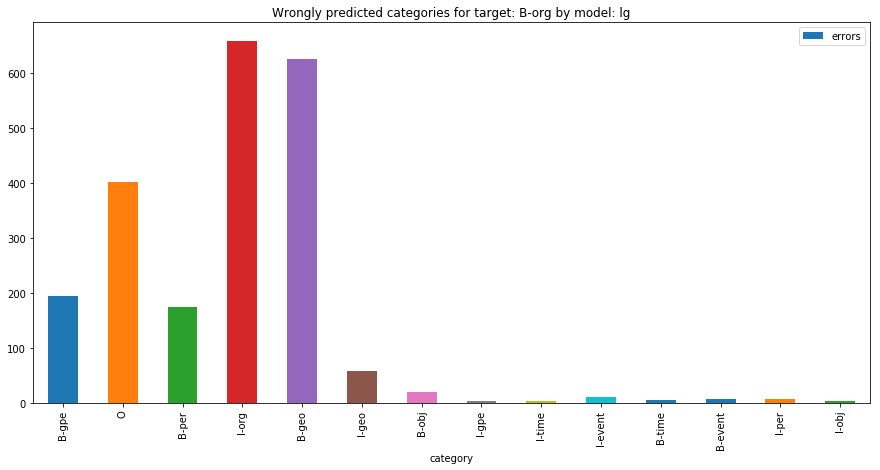

In [92]:
show_errors_in_target('B-org', 'lg')

Correct predictions for target: B-geo by model: tr    2694


,category,errors
0,I-org,957
1,I-per,493
2,I-gpe,159
3,B-per,116
4,O,536
5,I-geo,93
6,B-org,465
7,B-gpe,1160
8,B-time,164


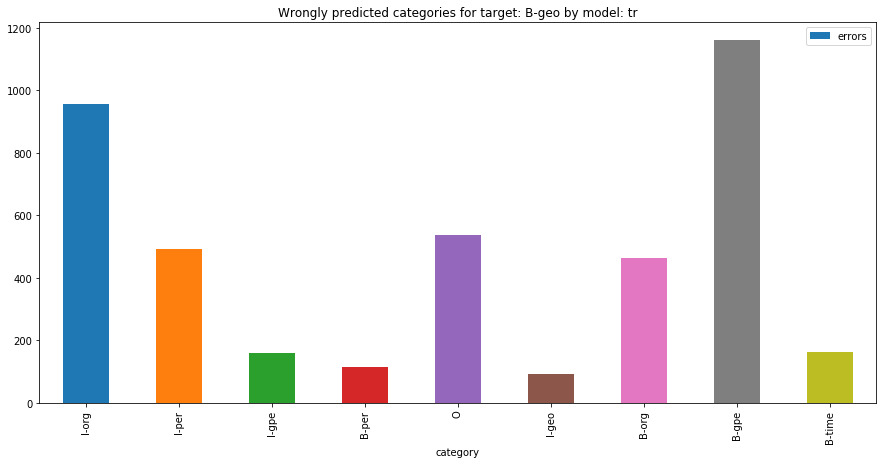

In [93]:
show_errors_in_target('B-geo', 'tr')

Correct predictions for target: B-time by model: lg    2712


,category,errors
0,O,1642
1,B-obj,1
2,B-event,5
3,I-time,155
4,B-geo,12
5,B-org,5
6,B-per,3


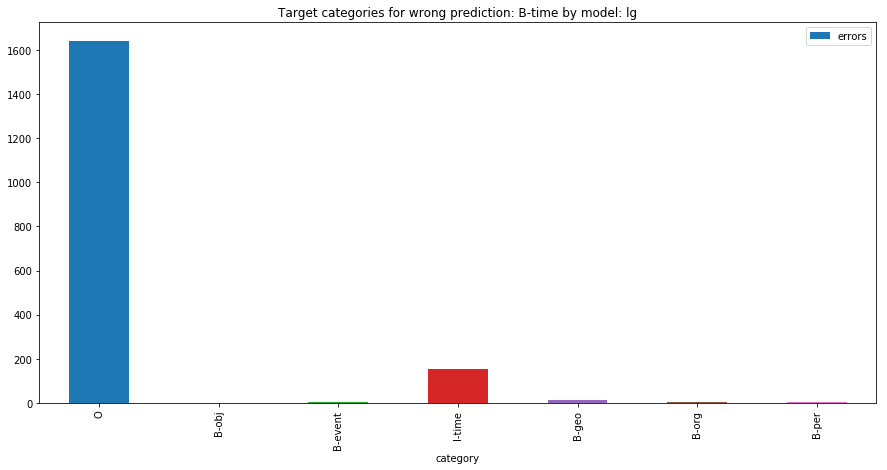

In [94]:
show_errors_in_model('B-time','lg')

Correct predictions for target: B-time by model: lg    2712


,category,errors
0,B-geo,45
1,O,354
2,I-time,519
3,I-org,2
4,I-event,28
5,B-per,7
6,B-obj,2
7,B-event,3
8,B-gpe,3
9,I-obj,1


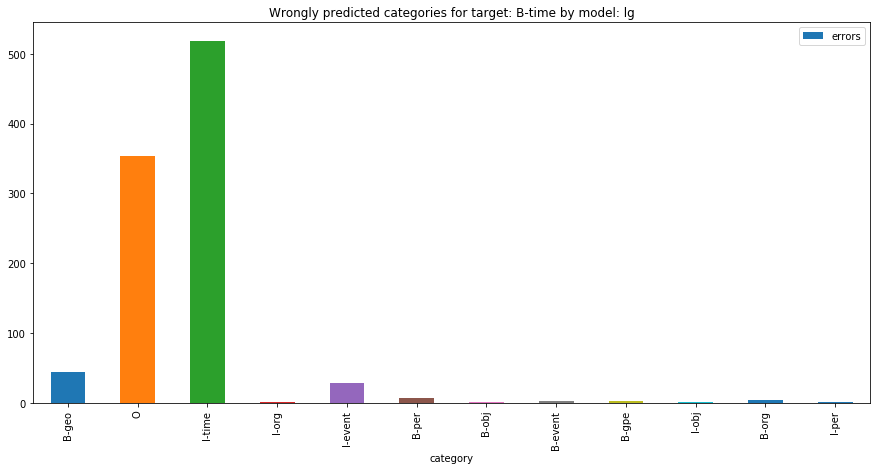

In [95]:
show_errors_in_target('B-time','lg')

Correct predictions for target: I-time by model: lg    675


,category,errors
0,I-org,4
1,B-time,155
2,O,217
3,I-event,33
4,I-per,4
5,B-obj,1
6,I-obj,1
7,B-geo,14
8,B-event,7
9,B-org,2


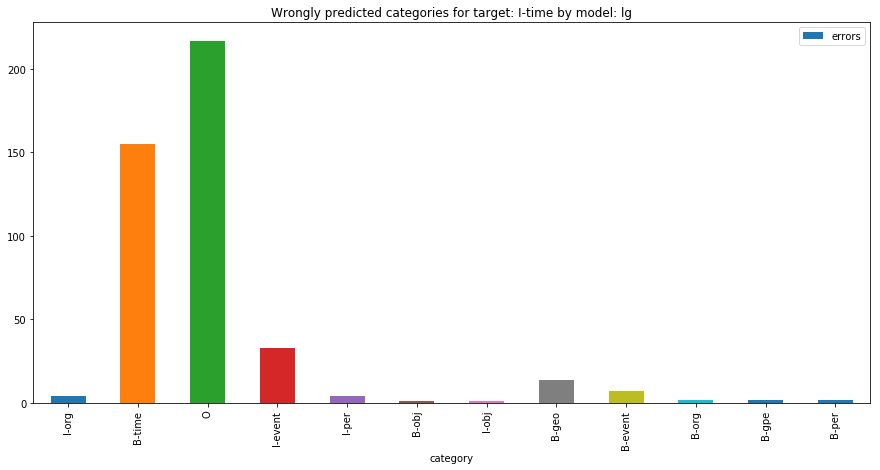

In [96]:
show_errors_in_target('I-time','lg')

Correct predictions for target: B-time by model: lg    2712


,category,errors
0,B-GPE,44
1,O,282
2,I-DATE,483
3,B-QUANTITY,4
4,I-TIME,36
5,B-LOC,1
6,I-ORG,2
7,I-MONEY,3
8,I-EVENT,28
9,B-ORDINAL,27


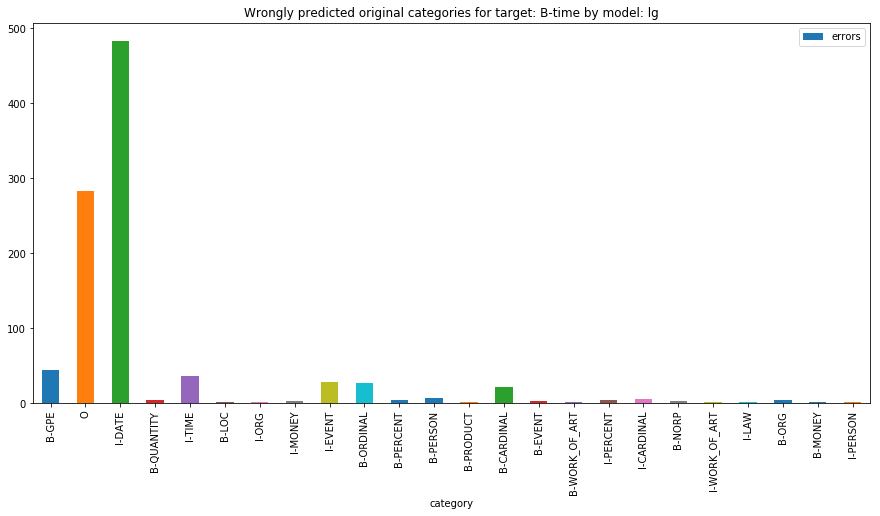

In [100]:
show_errors_in_target_op('B-time','lg')

Correct predictions for target: I-DATE by model: lg    642


,category,errors
0,O,1783
1,B-time,483
2,B-gpe,1
3,B-org,3
4,I-geo,3
5,I-event,2
6,B-geo,3


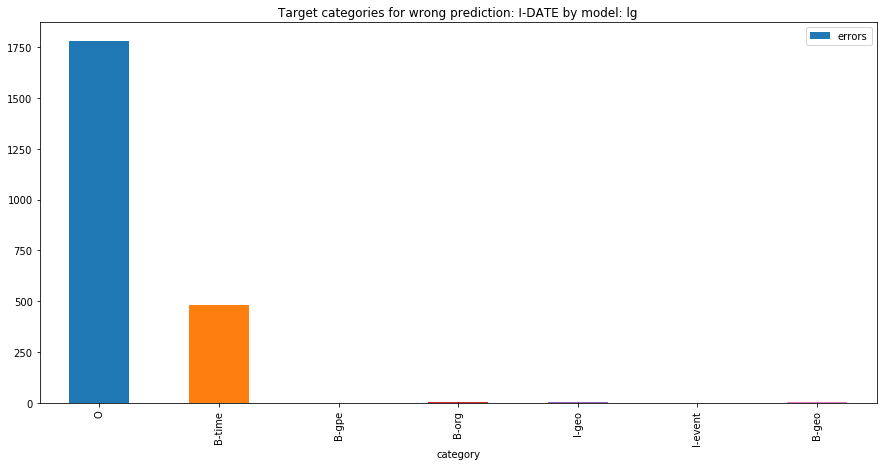

In [108]:
show_errors_in_model_op('I-DATE','lg')